In [31]:
import matplotlib.pyplot as plt
import numpy as np
from CA_model import CA_model
import evaluation
import iceing
import scipy.stats as stats
from skimage.transform import resize

In [32]:
iceing_test = iceing.iceing_model(0.45, 100)

In [33]:
ponds, sums = iceing_test.run(15_000_000)

In [34]:
areas_ising, perimeters_ising = evaluation.perim_area(ponds, pond_val = -1, ice_val = 1)

In [35]:
# replacement for CA model
size = 100
h_norm = np.random.normal(loc = 0.5, scale = 1, size = (int(size/3), int(size/3)))
h_norm = resize(h_norm, (size, size))
h_norm = np.heaviside(h_norm-0.6, 0) * h_norm

areas_norm, perimeters_norm = evaluation.perim_area(np.where(h_norm>0, -1, 1), pond_val = -1, ice_val = 1)

In [36]:
from evaluation import perim_area, get_lowest, curve_fit, D, integral_D

1. Bootstrap
    - resample with replacenemt from area and parimeter pairs
    - sample the same size as there are points (full array length)
    -
2. Func for calculate inflection point from the S curve
    - areas,dim

-> now we have 100 inflection values
-> do these inflection values - the average inflection value

In [324]:
def bootstrapping(ponds, pond_val=-1, ice_val=1, num_bootstrap=100):
    """
    This function returns a list of areas and perimeters after bootstrapping has been applied.
    :param ponds:
    :param pond_val:
    :param ice_val:
    :param num_bootstrap:
    :return:
    """

    # get areas and perimeters
    areas, perimeters = perim_area(ponds, pond_val=pond_val, ice_val=ice_val)

    # Bootstrap resampling
    areas_bootstrap = []
    perimeters_bootstrap = []

    for _ in range(num_bootstrap):
        indices = np.random.choice(len(areas), size=len(areas), replace=True)
        areas_sampled = areas[indices]
        perimeters_sampled = perimeters[indices]

        areas_bootstrap.append(areas_sampled)
        perimeters_bootstrap.append(perimeters_sampled)

    return areas_bootstrap, perimeters_bootstrap

In [394]:
def inv_D(y, a1, a2, a3, a4):
    arg = (y-a4)/a1

    x = 10**np.arctanh(arg/a2) + 10**a3

    return x

In [410]:
def fractal_dim_from_ap(areas, perimeters, bins = 50, min_area=0):

    # sort arrays
    areas, perimeters = zip(*sorted(zip(areas, perimeters)))
    areas = np.array(areas)
    perimeters = np.array(perimeters)[areas >= min_area]
    areas = areas[areas >= min_area]

    # bin data and get the lowest perimeter for fitting
    areas, perimeters = get_lowest(areas, perimeters, bins=bins)

    try:
        # Perform curve fitting
        fit_params, pcov = curve_fit(integral_D, np.log10(areas), np.log10(perimeters), p0=None)

        plot_areas = 10**np.linspace(0,5,1000)
        # calculate the expected values
        y_expect = D(np.log10(plot_areas), *fit_params[:4])

        y = (np.max(y_expect) + np.min(y_expect))/2
        point = inv_D(y, fit_params[0], fit_params[1], fit_params[2], fit_params[3])

    except:  # RuntimeError:
        return np.array([]), np.array([]), np.array([]), np.array([]), np.array([]), 99999
        #return np.array([]), np.array([]), np.array([]), np.array([]), np.array([])

    if len(areas > 7):
        Dims = []
        for i in range(3, len(areas) - 3):
            dim = 2 * (np.log(perimeters[i + 3]) - np.log(perimeters[i - 3])) / (
                        np.log(areas[i + 3]) - np.log(areas[i - 3]))
            Dims.append(dim)

        return plot_areas, y_expect, pcov, areas[3:-3], np.array(Dims), point
    else:
        return np.array([]), np.array([]), np.array([]), np.array([]), np.array([]), 99999

In [396]:
areas1, perimeters1 = perim_area(ponds, -1, 1)

In [397]:
areas_bootstrap, perimeters_bootstrap = bootstrapping(ponds,-1,1, 100)

In [421]:
def mean_inflation_pont(ponds):
    """
    This function calculates the average mean inflection value.
    :param ponds:
    :return: mean inflection value.
    """

    areas_bootstrap, perimeters_bootstrap = bootstrapping(ponds,-1,1, 100)

    inflection_list = []

    for i in range(100):
        areas_dim, dimensions, _, areas_scatter, dimensions_scatter, point= fractal_dim_from_ap(areas_bootstrap[i],perimeters_bootstrap[i], 50, 0)

        if point != 99999:
            inflection_list.append(point)

    return np.mean(inflection_list)

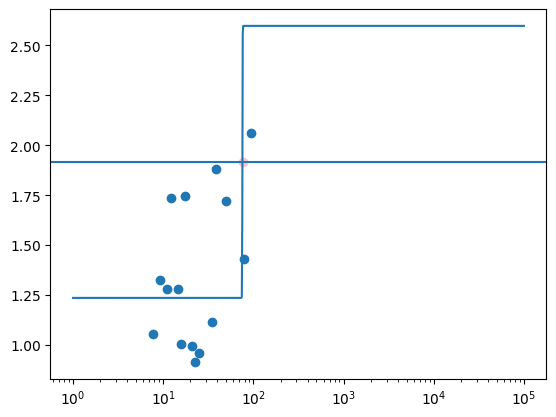

In [418]:
# Get the S curve for each bootstrapping area
areas_dim, dimensions, _, areas_scatter, dimensions_scatter, point= fractal_dim_from_ap(areas_bootstrap[18],perimeters_bootstrap[18], 50, 0)

# Calculate the inflexion point
#inflection_x, inflection_y = calculate_inflection_points(areas_dim,dimensions)

# Plot the curve + inflaxion point
plt.axhline((np.max(dimensions) + np.min(dimensions))/2)
plt.plot(areas_dim, dimensions)
plt.scatter(point, (np.max(dimensions) + np.min(dimensions))/2, color="pink")
plt.xscale("log")
plt.scatter(areas_scatter, dimensions_scatter)

In [386]:
print(dimensions[324])

1.521549361168093


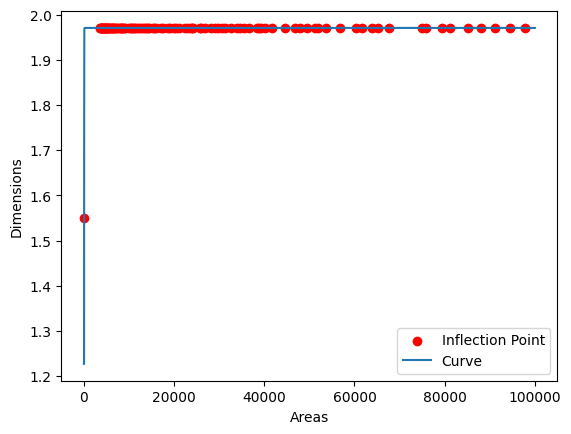

In [319]:
# Get the S curve for each bootstrapping area
areas_dim, dimensions, _, _, _ = fractal_dim_from_ap(areas_bootstrap[0], perimeters_bootstrap[0], 50, 0)

# Sort the areas_dim and dimensions arrays
sorted_indices = np.argsort(areas_dim)
areas_dim = areas_dim[sorted_indices]
dimensions = dimensions[sorted_indices]

# Calculate the inflection point
inflection_x, inflection_y = calculate_inflection_points(areas_dim, dimensions)

# Plot the curve and inflection point
plt.scatter(inflection_x, inflection_y, color="red", label="Inflection Point")
plt.plot(areas_dim, dimensions, label="Curve")
plt.legend()
plt.xlabel("Areas")
plt.ylabel("Dimensions")
plt.show()


In [10]:
areas_dim, dimensions, _, areas_scatter, dimensions_scatter = evaluation.fractal_dim(ponds, -1, 1, 50)
plt.plot(areas_dim, dimensions)
plt.scatter(areas_scatter, dimensions_scatter)

plt.xscale('log')

SyntaxError: invalid syntax (3252298255.py, line 1)